In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [11]:
df = pd.read_csv('../../../03. Datasets/Lifesnaps Fitbit/csv_rais_anonymized/daily_fitbit_sema_df_unprocessed.csv')

display(df.head())
df.info()

,Unnamed: 0,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,...,TENSE/ANXIOUS,TIRED,ENTERTAINMENT,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL
0,0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7410 entries, 0 to 7409
Data columns (total 63 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        7410 non-null   int64  
 1   id                                7410 non-null   object 
 2   date                              7410 non-null   object 
 3   nightly_temperature               3359 non-null   float64
 4   nremhr                            2475 non-null   float64
 5   rmssd                             2475 non-null   float64
 6   spo2                              1270 non-null   float64
 7   full_sleep_breathing_rate         2495 non-null   float64
 8   stress_score                      1876 non-null   float64
 9   sleep_points_percentage           1876 non-null   float64
 10  exertion_points_percentage        1876 non-null   float64
 11  responsiveness_points_percentage  1876 non-null   float64
 12  daily_

In [12]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['id'], inplace=True)


In [13]:
print(f'Files: {df.shape[0]}')
print(f'Columnes: {df.shape[1]}')

Files: 7410
Columnes: 61


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7410 entries, 0 to 7409
Data columns (total 61 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              7410 non-null   object 
 1   nightly_temperature               3359 non-null   float64
 2   nremhr                            2475 non-null   float64
 3   rmssd                             2475 non-null   float64
 4   spo2                              1270 non-null   float64
 5   full_sleep_breathing_rate         2495 non-null   float64
 6   stress_score                      1876 non-null   float64
 7   sleep_points_percentage           1876 non-null   float64
 8   exertion_points_percentage        1876 non-null   float64
 9   responsiveness_points_percentage  1876 non-null   float64
 10  daily_temperature_variation       3304 non-null   float64
 11  badgeType                         515 non-null    object 
 12  calori

In [17]:
df.describe()

,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,TENSE/ANXIOUS,TIRED,ENTERTAINMENT,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL
count,3359.000000,2475.000000,2475.000000,1270.000000,2495.000000,1876.000000,1876.000000,1876.000000,1876.000000,3304.000000,...,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,33.771650,62.714134,40.021232,95.893228,14.836954,64.181237,0.653998,0.632689,0.641791,-1.471843,...,0.220087,0.384279,0.084716,0.007424,0.772926,0.099563,0.024454,0.151092,0.087773,0.265502
std,0.905129,11.051482,21.305442,1.114339,3.774846,28.470995,0.303243,0.295897,0.293409,0.967792,...,0.414396,0.486531,0.278520,0.085859,0.419032,0.299482,0.154488,0.358216,0.283026,0.441697
min,25.518333,0.000000,0.000000,89.400000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.688866,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.305913,57.434500,25.442000,95.200000,13.200000,67.000000,0.633333,0.600000,0.633333,-2.182988,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.887166,63.146000,34.072000,95.900000,15.000000,75.000000,0.733333,0.725000,0.766667,-1.415089,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,34.342720,69.192000,48.723000,96.700000,17.000000,80.000000,0.833333,0.825000,0.833333,-0.722098,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,36.684793,92.547000,122.089000,100.000000,29.800000,94.000000,1.000000,1.000000,0.966667,3.393617,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
import warnings
warnings.filterwarnings('ignore')


### Mirem les dades nules del dataset


In [18]:
df.isnull().sum()

date                      0
nightly_temperature    4051
nremhr                 4935
rmssd                  4935
spo2                   6140
                       ... 
HOME_OFFICE            5120
OTHER                  5120
OUTDOORS               5120
TRANSIT                5120
WORK/SCHOOL            5120
Length: 61, dtype: int64

### Columnes numèriques i categòriques

In [40]:
numeric_col=df.select_dtypes(include=['int64', 'float64']).columns
categoric_col=df.select_dtypes(include=['category', 'object']).columns

print(f'Columnes numèriques:\n\n {numeric_col}')
print(f'Columnes categòriques:\n\n {categoric_col}')

Columnes numèriques:

 Index(['nightly_temperature', 'nremhr', 'rmssd', 'spo2',
       'full_sleep_breathing_rate', 'stress_score', 'sleep_points_percentage',
       'exertion_points_percentage', 'responsiveness_points_percentage',
       'daily_temperature_variation', 'calories', 'filteredDemographicVO2Max',
       'distance', 'bpm', 'lightly_active_minutes',
       'moderately_active_minutes', 'very_active_minutes', 'sedentary_minutes',
       'scl_avg', 'resting_hr', 'sleep_duration', 'minutesToFallAsleep',
       'minutesAsleep', 'minutesAwake', 'minutesAfterWakeup',
       'sleep_efficiency', 'sleep_deep_ratio', 'sleep_wake_ratio',
       'sleep_light_ratio', 'sleep_rem_ratio', 'steps',
       'minutes_in_default_zone_1', 'minutes_below_default_zone_1',
       'minutes_in_default_zone_2', 'minutes_in_default_zone_3', 'min_goal',
       'max_goal', 'ALERT', 'HAPPY', 'NEUTRAL', 'RESTED/RELAXED', 'SAD',
       'TENSE/ANXIOUS', 'TIRED', 'ENTERTAINMENT', 'GYM', 'HOME', 'HOME_OFFICE',
 

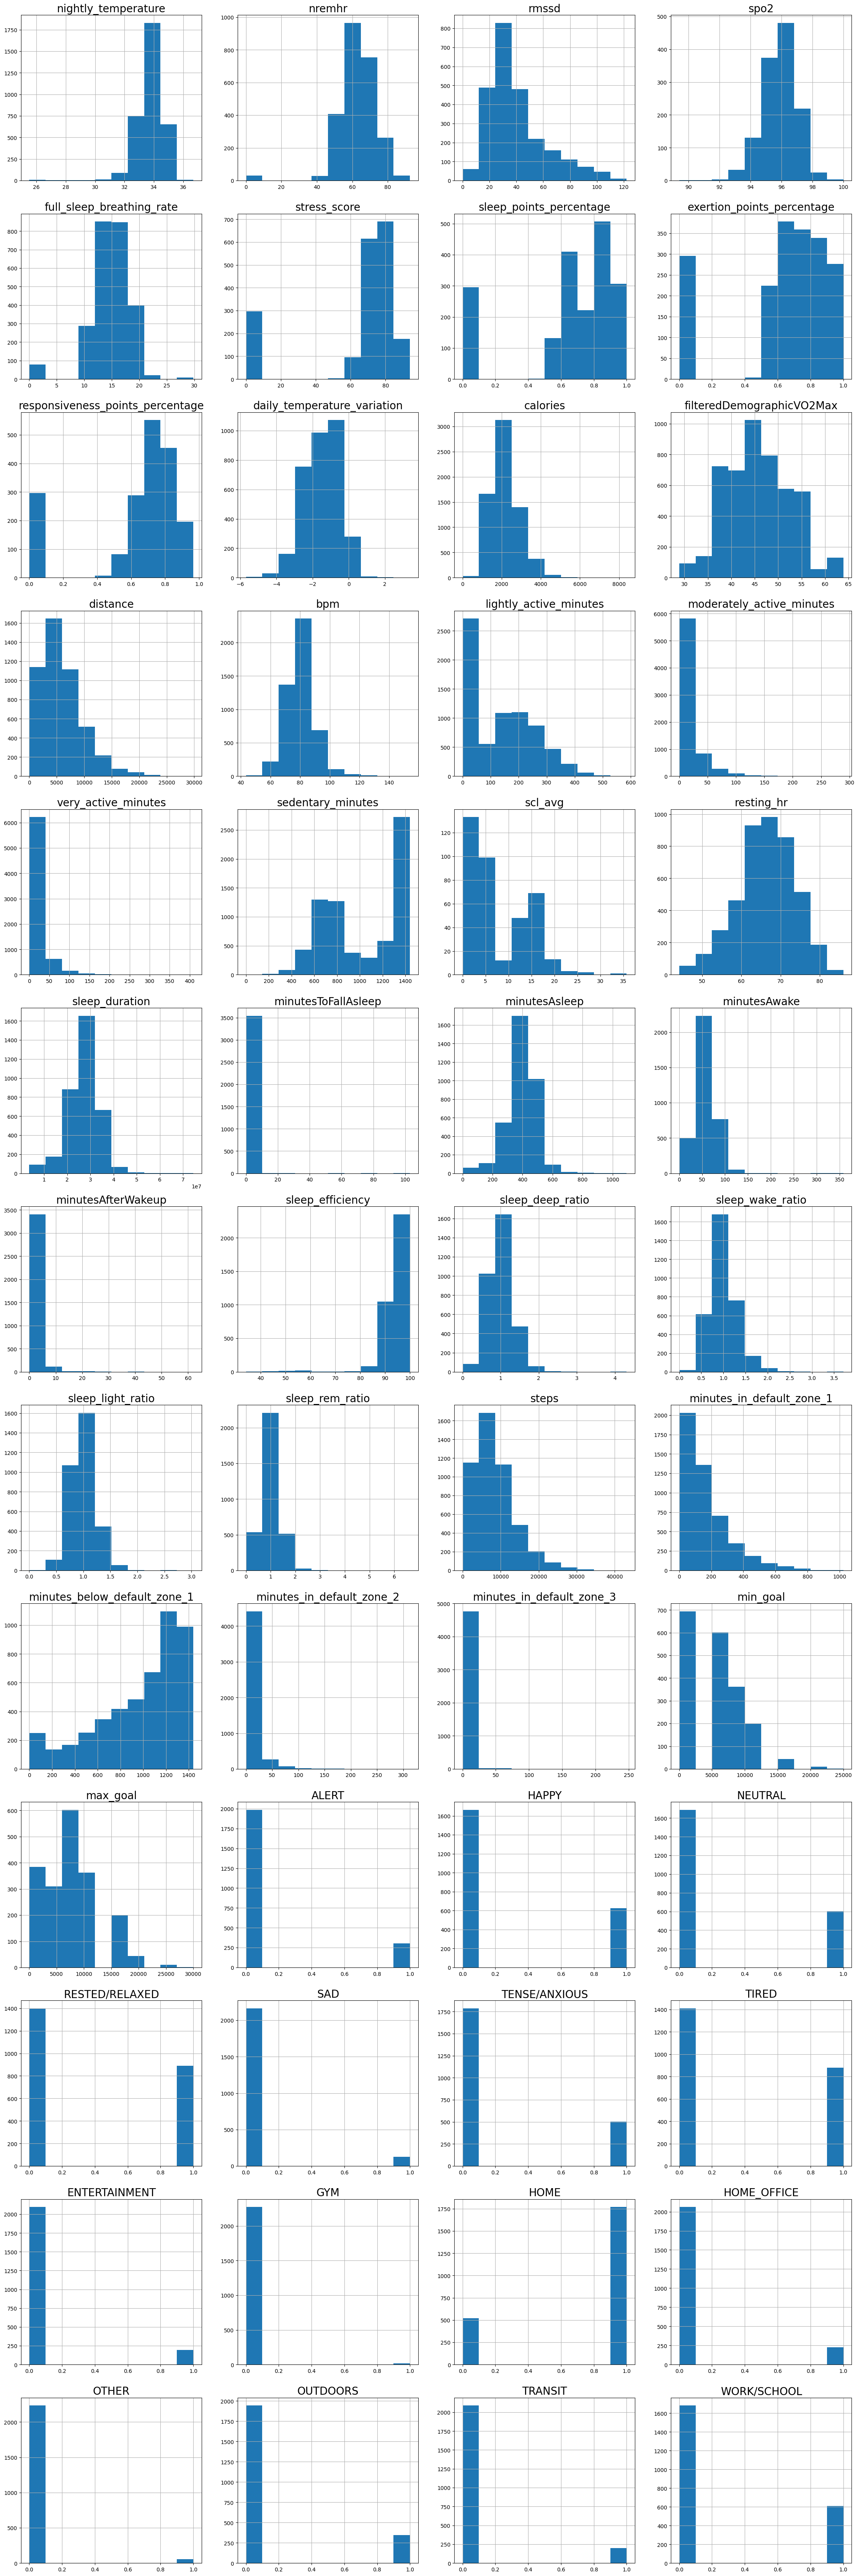

In [43]:
# Histogramas de les variables numèriques
plt.figure(figsize=(28,100))
plotnumber=1
for i in numeric_col:
    ax=plt.subplot(15,4,plotnumber)
    df[i].hist() 

    plt.title(i,size=20)
    plotnumber+=1
plt.show() 

<Axes: >

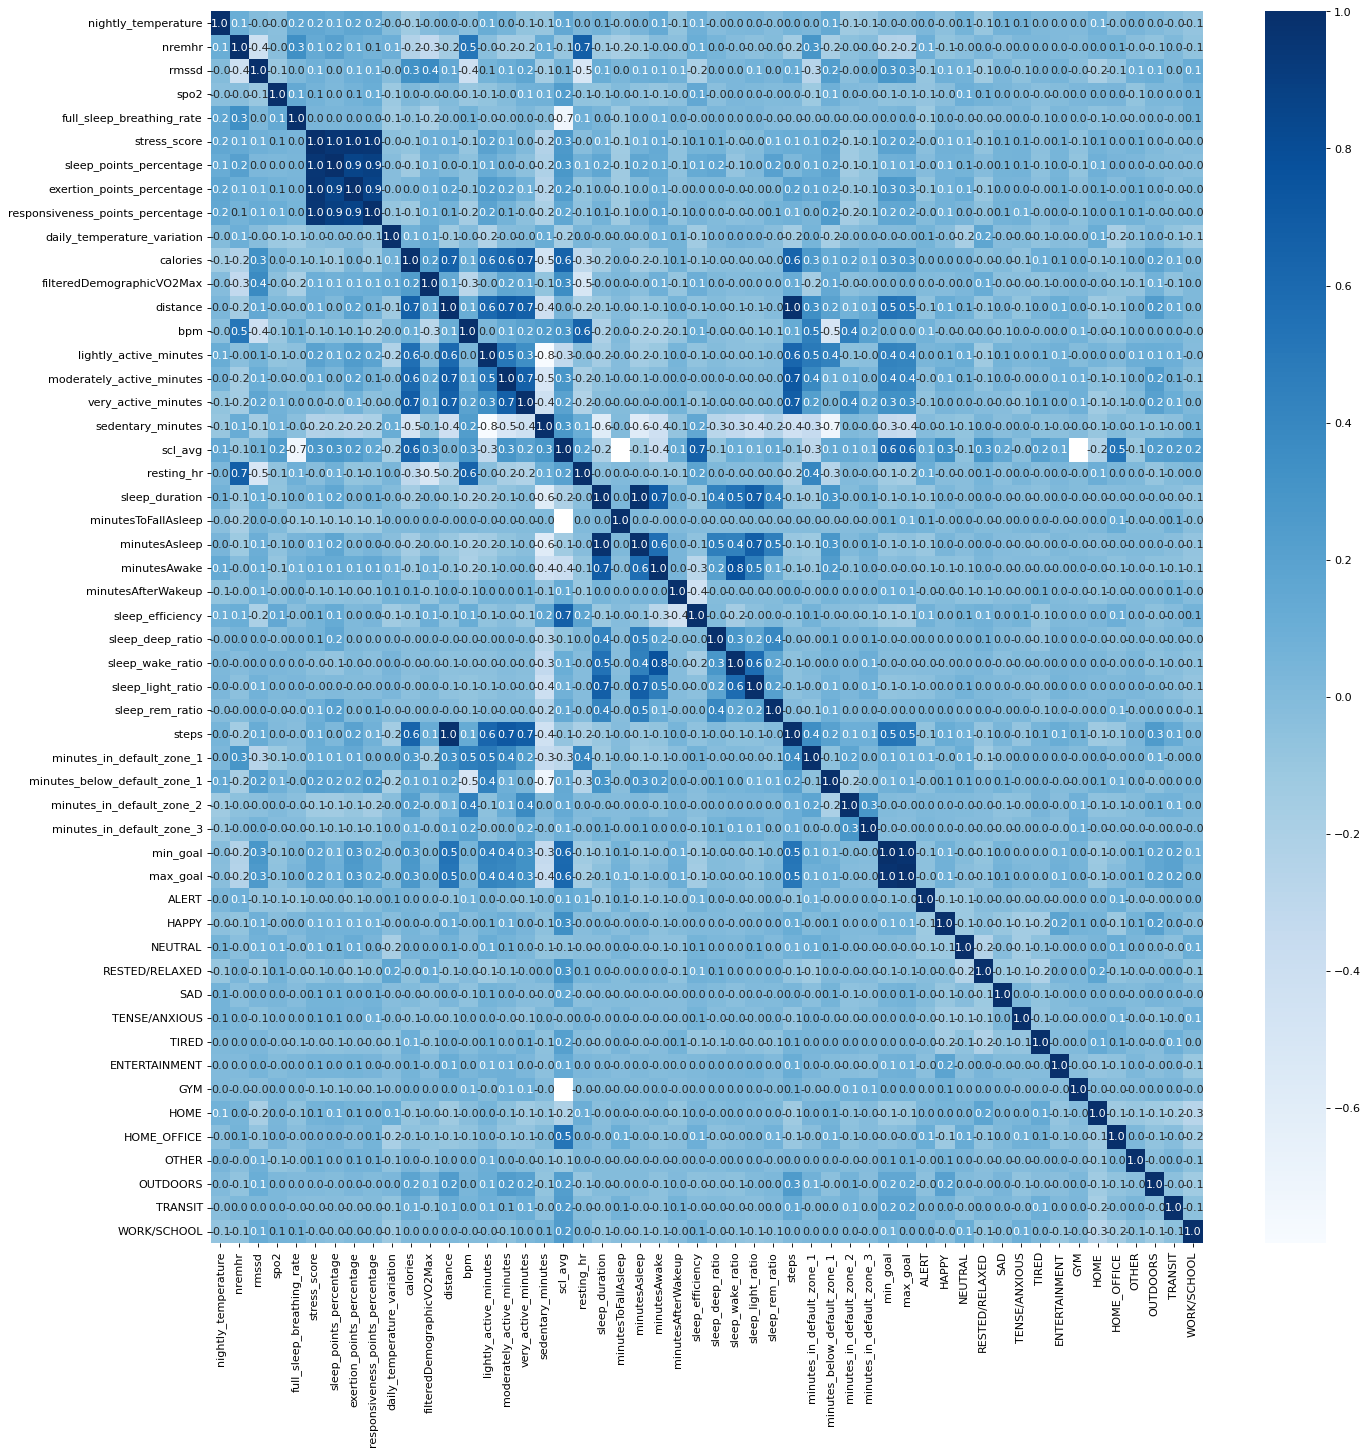

In [48]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(20, 20), dpi=80)
# plt.fig(figures)
sns.heatmap(corr, cmap="Blues", annot=True,fmt='.1f')